In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import daal4py 
import onedal
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('mushroom.csv')

In [3]:
data.describe()


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,b'x',b'y',b'n',b'f',b'n',b'f',b'c',b'b',b'b',b't',...,b'w',b'w',b'p',b'w',b'o',b'p',b'w',b'v',b'd',b'e'
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [5]:
data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',b'e'
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm',b'e'
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g',b'e'


In [6]:
def transform(data,x):
    dict={}
    count=0
    for i in (data[x].unique()):
        dict[i]=count
        count+=1
    for i in range(0,len(data[x].unique())+1):
        dict[i]=i
    for i in data[x]:
        data.loc[data[x] == i, x] = dict[i]

In [7]:
for i in data:
    transform(data,i)

In [8]:
data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,1
2,1,0,2,0,2,0,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
3,0,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,3,0,1,1,0,1,...,0,0,0,0,0,1,1,2,1,1


In [9]:
list(data['cap-shape'].unique())

[0, 1, 2, 3, 4, 5]

In [10]:
for i in data:
    uniq = data[i].unique()
    new = []
    for j in data[i]:
        new.append(np.where(uniq==j)[0][0])
    
    data[i] = new


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 8124 non-null   int64
 1   cap-surface               8124 non-null   int64
 2   cap-color                 8124 non-null   int64
 3   bruises%3F                8124 non-null   int64
 4   odor                      8124 non-null   int64
 5   gill-attachment           8124 non-null   int64
 6   gill-spacing              8124 non-null   int64
 7   gill-size                 8124 non-null   int64
 8   gill-color                8124 non-null   int64
 9   stalk-shape               8124 non-null   int64
 10  stalk-root                8124 non-null   int64
 11  stalk-surface-above-ring  8124 non-null   int64
 12  stalk-surface-below-ring  8124 non-null   int64
 13  stalk-color-above-ring    8124 non-null   int64
 14  stalk-color-below-ring    8124 non-null 

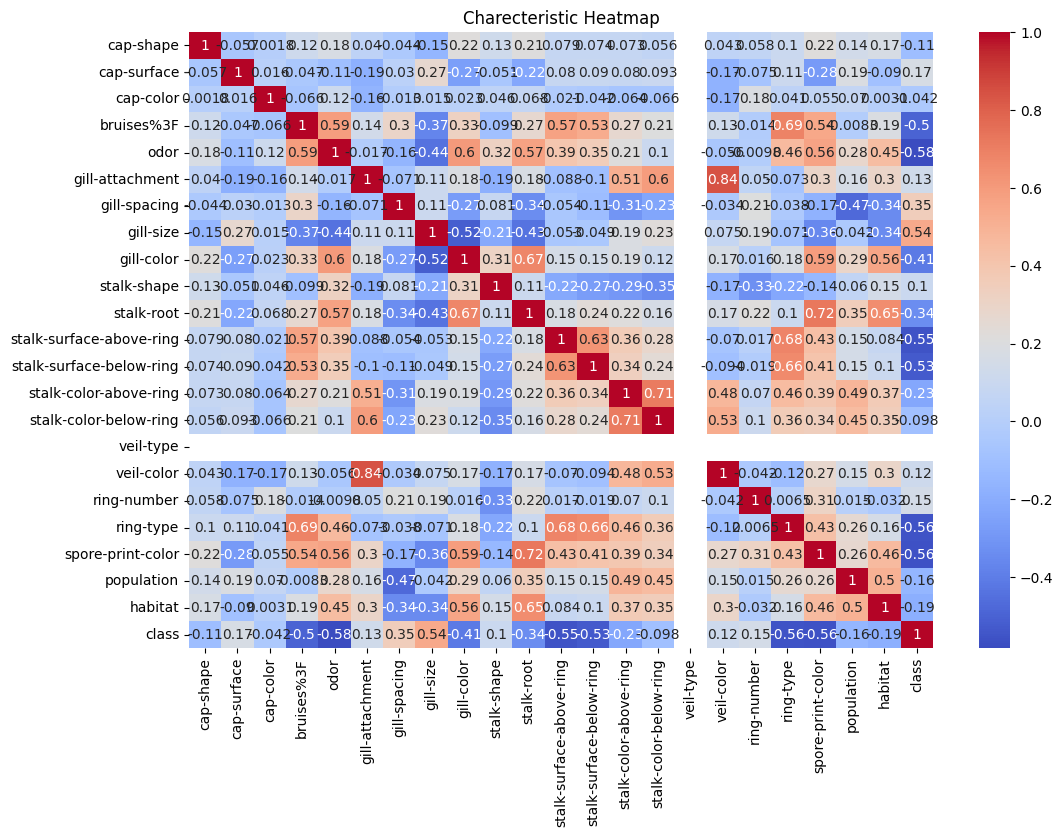

In [12]:
plt.figure(figsize=(12, 8))
plt.title('Charecteristic Heatmap')
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


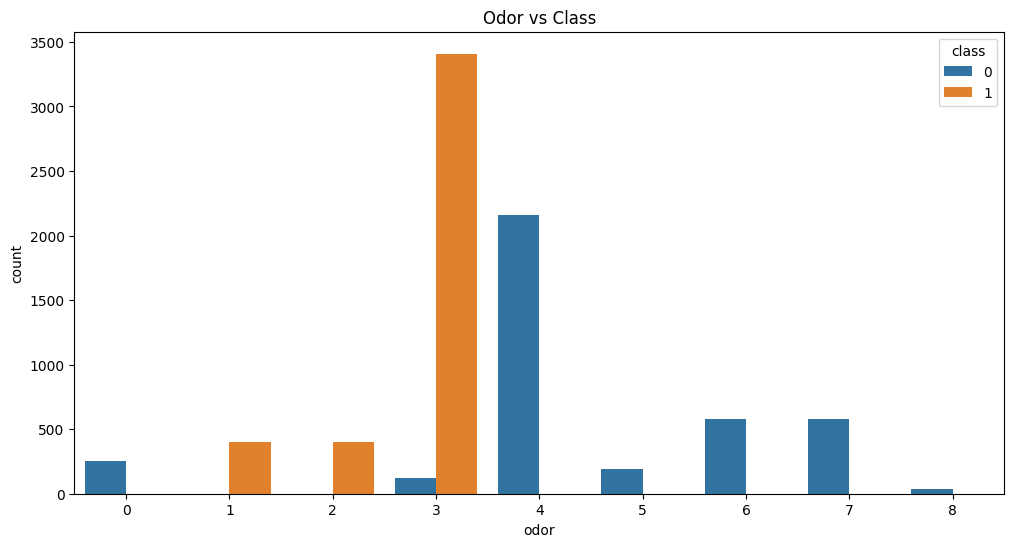

In [13]:
plt.figure(figsize=(12, 6))
plt.title('Odor vs Class')
plt.xlabel('X Odor')
plt.ylabel('Y Class')
sns.countplot(x='odor', hue='class', data=data)
plt.show()

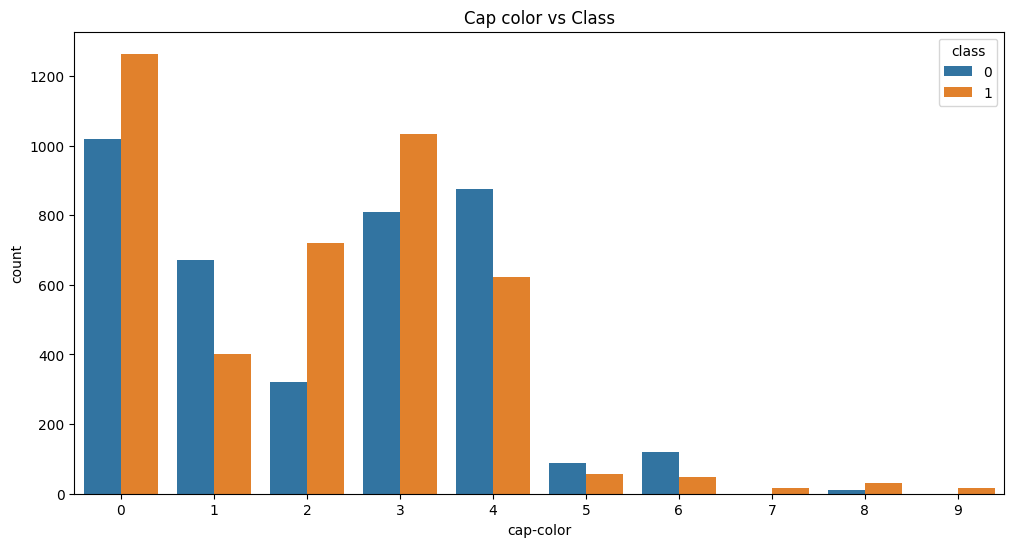

In [14]:
plt.figure(figsize=(12, 6))
plt.title('Cap color vs Class')
plt.xlabel('X Cap Color')
plt.ylabel('Y Class')
sns.countplot(x='cap-color', hue='class', data=data)
plt.show()


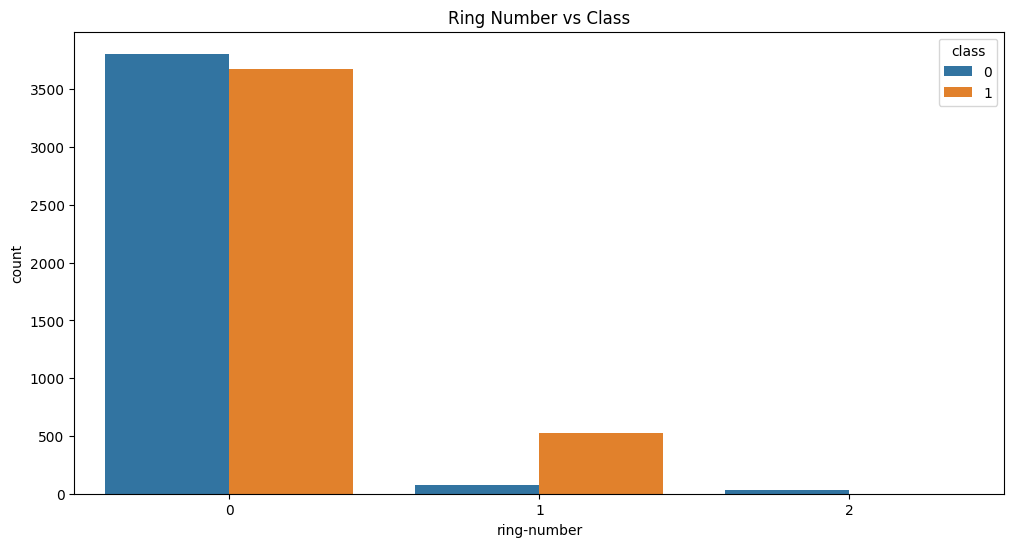

In [15]:
plt.figure(figsize=(12, 6))
plt.title('Ring Number vs Class')
plt.xlabel('X ')
plt.ylabel('Y Class')
sns.countplot(x='ring-number', hue='class', data=data)
plt.show()


In [16]:
# analyze the value counts of some features
print(data['cap-shape'].value_counts())
print(data['stalk-root'].value_counts())

0    3656
3    3152
4     828
1     452
2      32
5       4
Name: cap-shape, dtype: int64
2    3776
4    2480
0    1120
1     556
3     192
Name: stalk-root, dtype: int64


# Data Pre Processing 

In [18]:

# Preprocessing
X = data.iloc[:, :-1]
y = data.iloc[:, -1].replace({0: False, 1: True})

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random forest Classifier

In [34]:
from sklearnex import patch_sklearn
patch_sklearn()
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
print("Random Forest Classifier Accuracy: ", rfc.score(X_test, y_test))


Random Forest Classifier Accuracy: 0.9743631489358275


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# KNeighbors Classifier

In [33]:
from sklearnex import patch_sklearn
patch_sklearn()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(" KNeighbors Classifier Accuracy: ", knn.score(X_test, y_test))


 KNeighbors Classifier Accuracy: 0.9873472934719210


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Logistic Regression Model

In [23]:
from sklearnex.neighbors import KNeighborsClassifier
from sklearnex import patch_sklearn
patch_sklearn()
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
print("Logistic Regression Accuracy: ", lr.score(X_test, y_test))


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Logistic Regression Accuracy:  0.9815384615384616


# SVC

In [24]:
from sklearnex.svm import SVC
from sklearnex import patch_sklearn
patch_sklearn()
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
print("SVM Accuracy: ", svm.score(X_test, y_test))


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


SVM Accuracy:  0.9993846153846154


# XGBoost

In [35]:
from sklearnex import patch_sklearn
patch_sklearn()
xgbc = xgb.XGBClassifier(random_state=42)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
print("XGBoost Accuracy: ", xgbc.score(X_test, y_pred))


XGBoost Accuracy:  0.9789172934719210


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Accuracy Comparison of Models

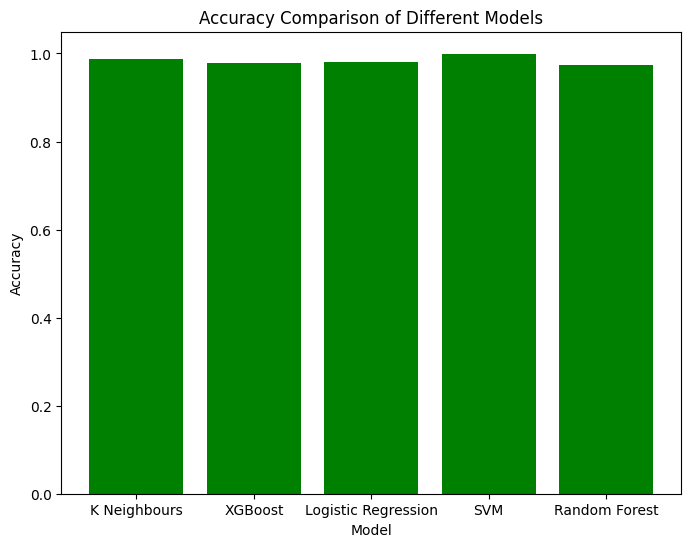

In [54]:
models = ['K Neighbours', 'XGBoost', 'Logistic Regression', 'SVM', 'Random Forest']
fig, ax = plt.subplots(figsize=(8,6))
accuracies = [kn_accuracy, xgb_accuracy, lr_accuracy, svm_accuracy, rf_accuracy]
ax.bar(models, accuracies, color='green')
ax.set_title('Accuracy Comparison of Different Models')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()

# Conclusion

Clearly the SVM or the Support vector machine model has the highest accuracy to predict mushrooms that are edible or poisonous.